In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers
import tensorflow as tf

2022-10-25 17:00:20.271008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 17:00:20.374252: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-25 17:00:20.374271: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-25 17:00:20.399863: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-25 17:00:20.845204: W tensorflow/stream_executor/platform/de

In [21]:
def ellipse(t, a, b, x0, y0):
    x = x0 + a*np.cos(t)
    y = x0 + b*np.sin(t)
    return x, y


def rotate(x, y, alph):
    x_ans = x*np.cos(alph) - y*np.sin(alph)
    y_ans = x*np.sin(alph) + y*np.cos(alph)
    return x_ans, y_ans

In [22]:
t = np.linspace(0, 2*np.pi, 200)
x1, y1 = ellipse(t, 0.4, 0.15, 0, 0)
x1, y1 = rotate(x1, y1, np.pi / 6)

x2, y2 = ellipse(t, 0.7, 0.5, 0, 0)
x2, y2 = rotate(x2, y2, np.pi / 3)

x3, y3 = ellipse(t, 1, 1, 0, 0)

(-1.09986915899354, 1.0999937694758828, -1.099965731583572, 1.099965731583572)

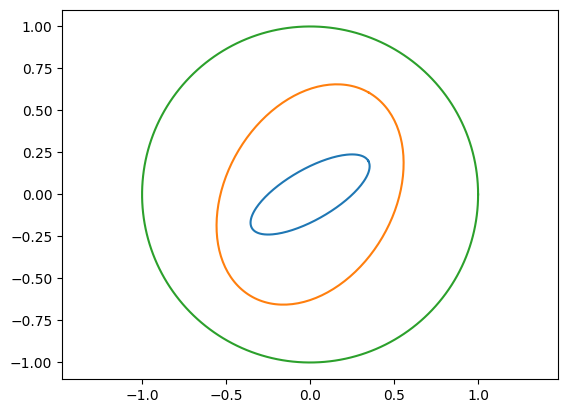

In [72]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.axis('equal')

In [48]:
data1 = [[cords, [1, 0, 0]] for cords in zip(x1, y1)]
data2 = [[cords, [0, 1, 0]] for cords in zip(x2, y2)]
data3 = [[cords, [0, 0, 1]] for cords in zip(x3, y3)]
dataset = data1 + data2 + data3

In [49]:
train_X = [x[0] for x in dataset]
train_y = [x[1] for x in dataset]

In [88]:
class RBF(layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        super(RBF, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.mu = self.add_weight(
            shape=(input_shape[1], self.units), initializer="random_normal", trainable=True
        )
        self.sigm = self.add_weight(
            shape=(self.units,) , initializer="random_normal", trainable=True
        )
        super().build(input_shape)
        
    def call(self, inputs):
        l_norm = tf.reduce_sum((tf.expand_dims(inputs, axis=2) - self.mu) ** 2, axis = 1)
        return tf.exp(l_norm*self.sigm)
predictor =  keras.Sequential([RBF(10,input_dim=2),
                               layers.Dense(3,activation='sigmoid', name="sigmoid")
                               ])
opt = keras.optimizers.Adam(learning_rate=0.01)
predictor.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [89]:
predictor.fit(train_X, train_y, batch_size=len(dataset)//10, epochs=500, shuffle=True)

Epoch 1/500
10/10 [==============================] - 0s 985us/step - loss: 0.3293 - mae: 0.5419
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2330 - mae: 0.4652
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2111 - mae: 0.4235
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2002 - mae: 0.4103
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1853 - mae: 0.4034
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1736 - mae: 0.3932
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1616 - mae: 0.3750
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1494 - mae: 0.3545
Epoch 9/500
10/10 [==============================] - 0s 978us/step - loss: 0.1375 - mae: 0.3330
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 0.1275 - mae: 0.3103
Epoch 11/500
10/10 [==============================] - 0

In [86]:
pole = [(x,y) for x in np.linspace(-1,1,200) for y in np.linspace(-1,1,200)]
pred = predictor.predict(pole)
z = []
for i in range(200):
    
    z.append(pred[i*200: (i+1)*200])

1250/1250 [==============================] - 1s 667us/step


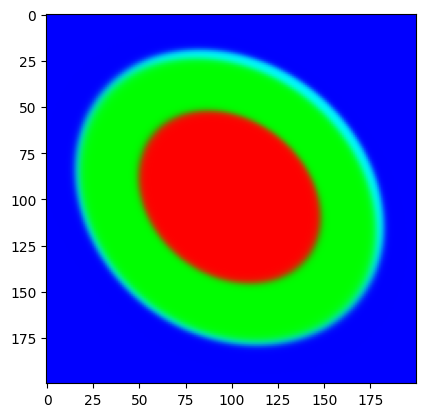

In [87]:
plt.imshow(z)